# Phase 3 Testing

**Purpose:**

Evaluate Phase 3 feature engineering and model training pipeline on a small sample of the TMDB dataset.

**Key Steps:**
1. Load and preprocess the dataset (basic cleaning, log-transform target, weighted votes).
2. Expand features using Phase 3 feature engineering (SVD, top categorical features).
3. Train and cross-validate multiple regression models:
   - Random Forest
   - LightGBM
   - Gradient Boosting
   - XGBoost
   - MLP
4. Evaluate models using MSE, R², RMSE, and MAPE.
5. Plot feature importances (for tree-based models) and predicted vs actual values.

**Notes:**
- Using a small sample (~5000 rows) for fast testing.
- Hyperparameters are not fully tuned — purpose is to verify pipeline correctness.
- Full training on the complete dataset is done in Phase 4.

In [5]:
# Imports
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split

from src.preprocess import preprocess
from src.feature_engineering import expand_features_fast
from src.train_model import (
    train_random_forest,
    train_lightgbm,
    train_gradient_boost,
    train_xgb,
    train_mlp
)
from src.evaluate import full_evaluation

In [6]:
# Load and preprocess dataset
print("Loading and preprocessing dataset (small sample)...")
df = preprocess(
    "/data/tmdb_movie_dataset.csv",
    nrows=5000 # smaller subset for speed
)
print("✅ Dataset shape:", df.shape)
df.head(3)

Loading and preprocessing dataset (small sample)...
✅ Dataset shape: (4308, 31)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,production_countries,spoken_languages,keywords,release_year,release_month,release_quarter,release_season,log_runtime,weighted_vote,log_revenue
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",2010,7,3,3,5.003946,8.219421,20.531540
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,"United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",2014,11,4,4,5.135798,8.259714,20.369058
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,"United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",2008,7,3,3,5.030438,8.336264,20.727814


In [7]:
# Expand features
print("\nExpanding features for fast testing...")
df, new_features = expand_features_fast(df)
print(f"✅ Features generated: {len(new_features)}")

# Base features
base_features = [
    'vote_average', 'vote_count', 'runtime',
    'release_year', 'release_month', 'release_quarter', 'release_season',
    'log_runtime', 'weighted_vote'
]

feature_cols = base_features + new_features
print(f"✅ Total features used: {len(feature_cols)}")


Expanding features for fast testing...
✅ Features generated: 50
✅ Total features used: 59


In [8]:
# Train/Test Split
print("\nSplitting dataset into train/test...")
X = df[feature_cols]
y = df["log_revenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Splitting dataset into train/test...
✅ Train shape: (3015, 59), Test shape: (1293, 59)



=== RandomForest ===
Full evaluation on test data:
MSE : 1.48
RMSE: 1.22
R²  : 0.51
MAPE: 5.15%


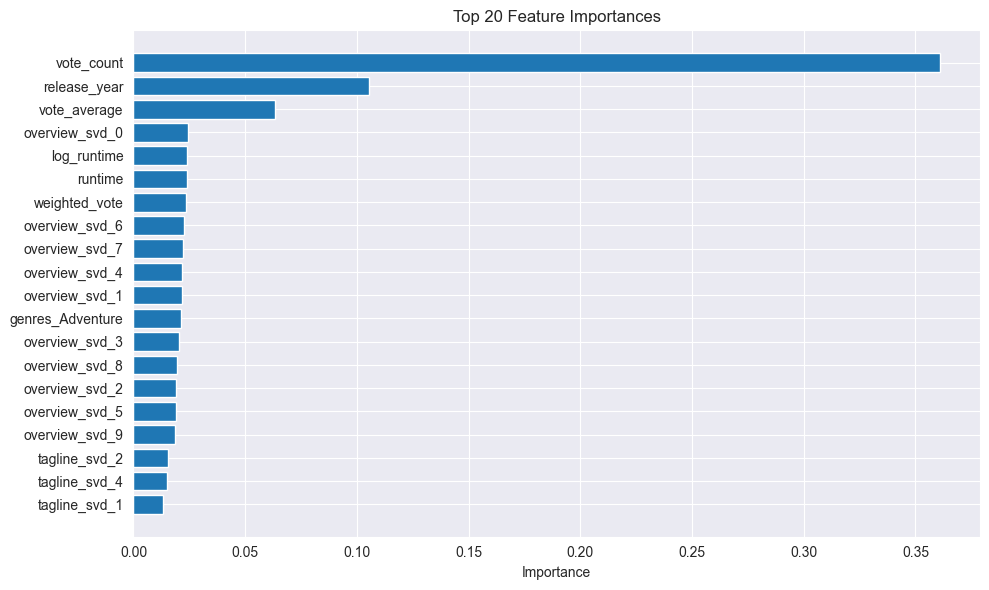

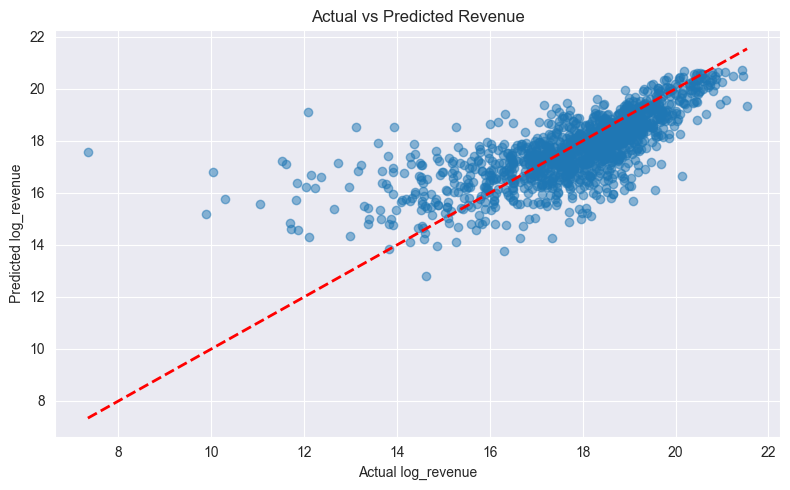

{'mse': 1.4803836501027585,
 'rmse': np.float64(1.216710175063379),
 'r2': 0.5062938356622357,
 'mape': 0.05148961086678974}

In [9]:
# Train RandomForest
print("\n=== RandomForest ===")
rf_model, _, _, _, _, _, _ = train_random_forest(
    pd.concat([X_train, y_train], axis=1),
    feature_cols
)

print("Full evaluation on test data:")
full_evaluation(rf_model, X_test, y_test, feature_names=X_test.columns, top_n=20)


=== LightGBM ===
Full evaluation on test data:
MSE : 1.37
RMSE: 1.17
R²  : 0.54
MAPE: 4.99%


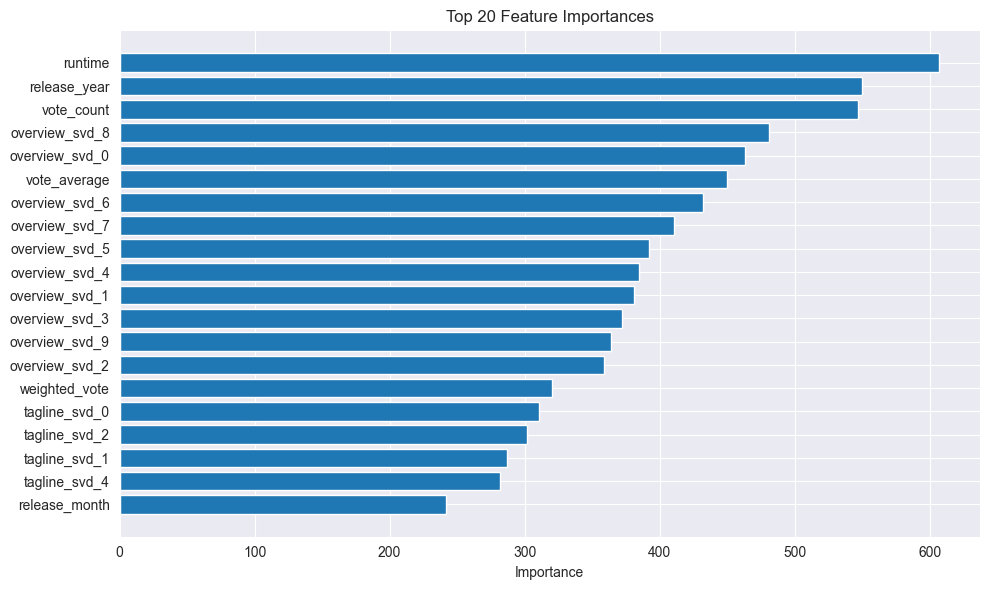

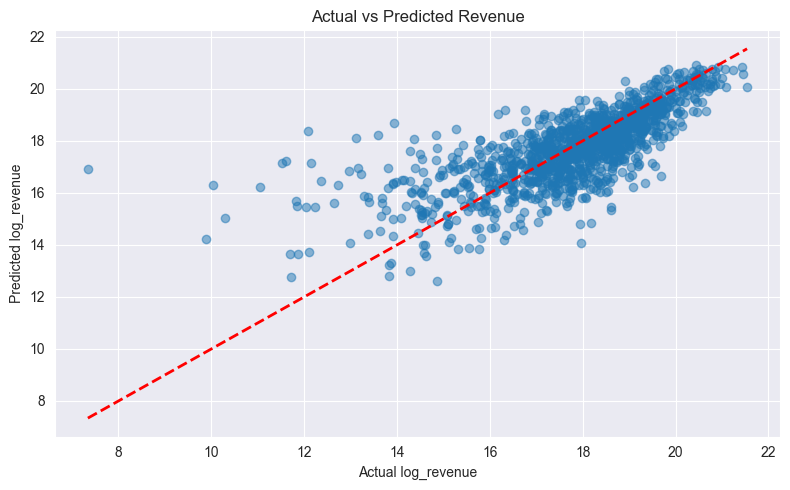

{'mse': 1.3663765268407415,
 'rmse': np.float64(1.168921095215901),
 'r2': 0.5443150739601365,
 'mape': 0.04988641415186933}

In [10]:
# Train LightGBM
print("\n=== LightGBM ===")
lgb_model, _, _, _, _, _, _ = train_lightgbm(
    pd.concat([X_train, y_train], axis=1),
    feature_cols
)

print("Full evaluation on test data:")
full_evaluation(lgb_model, X_test, y_test, feature_names=X_test.columns, top_n=20)


=== GradientBoost ===
Full evaluation on test data:
MSE : 1.39
RMSE: 1.18
R²  : 0.54
MAPE: 5.02%


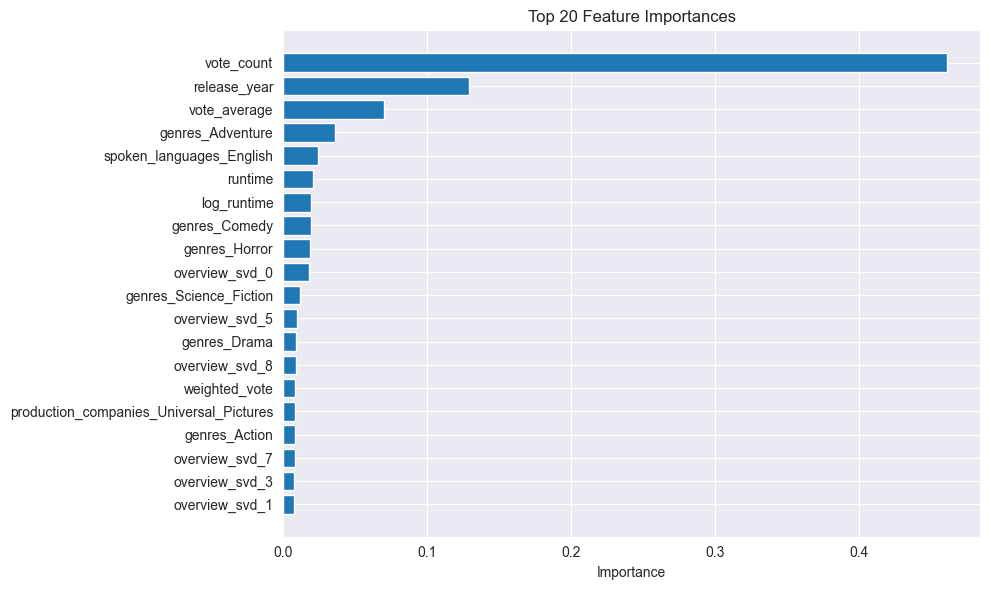

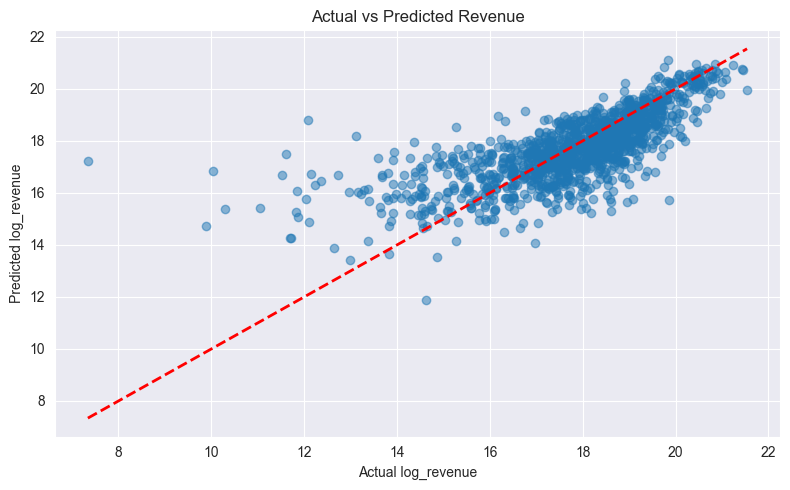

{'mse': 1.3859309970350593,
 'rmse': np.float64(1.1772557058834157),
 'r2': 0.5377936817017015,
 'mape': 0.050203080793271834}

In [11]:
# Train GradientBoost
print("\n=== GradientBoost ===")
gb_model, _, _, _, _, _, _ = train_gradient_boost(
    pd.concat([X_train, y_train], axis=1),
    feature_cols
)

print("Full evaluation on test data:")
full_evaluation(gb_model, X_test, y_test, feature_names=X_test.columns, top_n=20)


=== XGBoost ===
Full evaluation on test data:
MSE : 1.41
RMSE: 1.19
R²  : 0.53
MAPE: 5.01%


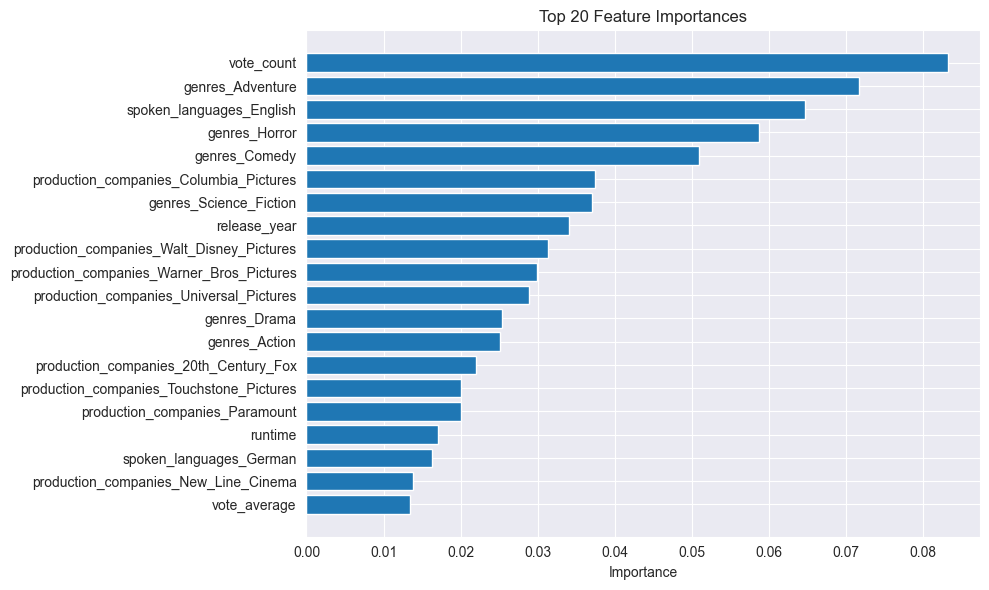

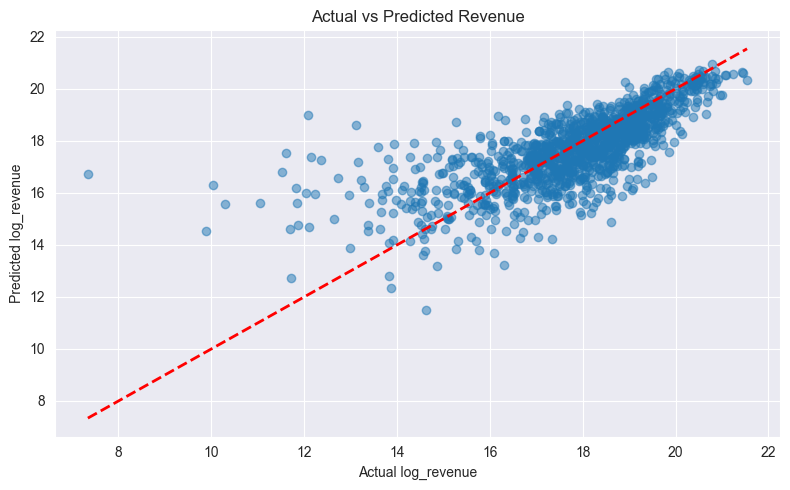

{'mse': 1.4098772523585197,
 'rmse': np.float64(1.1873825214978195),
 'r2': 0.5298076343921558,
 'mape': 0.050094402185761236}

In [14]:
# Train XGBoost
print("\n=== XGBoost ===")
xgb_model, _, _, mse_mean, mse_std, r2_mean, r2_std = train_xgb(
    pd.concat([X_train, y_train], axis=1),
    feature_cols
)
print("Full evaluation on test data:")
full_evaluation(xgb_model, X_test, y_test, feature_names=X_test.columns)


=== MLP ===
Full evaluation on test data:
MSE : 2.80
RMSE: 1.67
R²  : 0.07
MAPE: 7.42%
Feature importance not available for this model type.


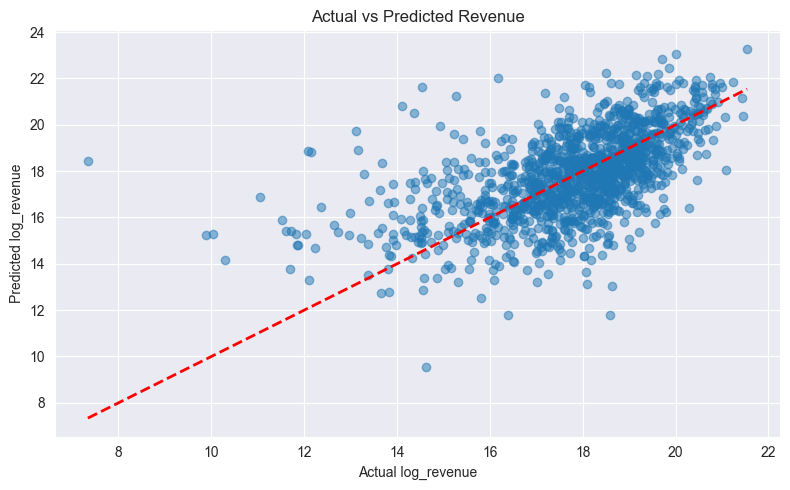

{'mse': 2.799442914672747,
 'rmse': np.float64(1.6731535837073497),
 'r2': 0.06638915960083958,
 'mape': 0.07418325501875826}

In [13]:
# Train MLP
print("\n=== MLP ===")
mlp_model, _, _, _, _, _, _ = train_mlp(
    pd.concat([X_train, y_train], axis=1),
    feature_cols
)

print("Full evaluation on test data:")
full_evaluation(mlp_model, X_test, y_test, feature_names=X_test.columns, top_n=20)